In [42]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [43]:
# Read data
car_kick = pd.read_csv("car_kick.csv")
car_kick

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,IsBadBuy
0,1289952000,2006,4,51954,6197,7062,9605,10426,5341,6351,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1242691200,2005,4,89127,3688,4783,4483,5666,3688,4783,...,2,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1248220800,2006,3,71271,6897,8449,7949,9625,6868,8549,...,1,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1285718400,2008,2,83338,7878,8925,11723,13026,7801,8704,...,2,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1237334400,2007,2,58698,8800,10091,10004,11398,7355,8543,...,1,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,1285804800,2008,2,56072,6255,6972,9852,10567,6326,7126,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,22808,77061,TX,0,1
67207,1274918400,2004,6,94232,8359,9645,12042,13302,7505,8188,...,1,Alloy,'TOP LINE ASIAN','MEDIUM SUV',OTHER,17675,28273,NC,0,1
67208,1280448000,2004,6,79534,2805,3826,6132,6871,3106,4479,...,1,Alloy,AMERICAN,MEDIUM,GM,18880,37771,TN,0,1
67209,1285200000,2003,7,79394,4042,5296,7335,8983,3534,4732,...,2,Covers,AMERICAN,'MEDIUM SUV',GM,23657,92337,CA,0,1


In [44]:
car_kick.keys()

Index(['PurchDate', 'VehYear', 'VehicleAge', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost', 'WarrantyCost', 'Auction', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'BYRNO', 'VNZIP1',
       'VNST', 'IsOnlineSale', 'IsBadBuy'],
      dtype='object')

In [45]:
# Select the desired columns only
desired_columns = ['Auction', 'Color', 'IsBadBuy', 'MMRCurrentAuctionAveragePrice', 'Size','TopThreeAmericanName',
'VehBCost', 'VehicleAge', 'VehOdo', 'WarrantyCost', 'WheelType']
carAuction = car_kick [desired_columns]

In [46]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,MANHEIM,SILVER,0,5341,MEDIUM,CHRYSLER,6500,4,51954,1086,Covers
1,ADESA,SILVER,0,3688,MEDIUM,FORD,3680,4,89127,983,Covers
2,MANHEIM,RED,0,6868,LARGE,GM,7170,3,71271,1974,Alloy
3,MANHEIM,BLACK,0,7801,LARGE,GM,7670,2,83338,2152,Covers
4,ADESA,WHITE,0,7355,LARGE,GM,7165,2,58698,1500,Alloy


In [47]:
# Examine missing values again
carAuction.isnull().sum()

Auction                          0
Color                            0
IsBadBuy                         0
MMRCurrentAuctionAveragePrice    0
Size                             0
TopThreeAmericanName             0
VehBCost                         0
VehicleAge                       0
VehOdo                           0
WarrantyCost                     0
WheelType                        0
dtype: int64

In [48]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                          int64
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [49]:
# Replacing 1 with Yes and 0 with No in the target column IsBadBuy
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].replace({1:'Yes', 0:'No'})

/var/folders/25/_xzr2f1s2yjgy1xmfcjypv8m0000gn/T/ipykernel_19323/3990515223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carAuction['IsBadBuy'] = carAuction['IsBadBuy'].replace({1:'Yes', 0:'No'})


In [50]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

/var/folders/25/_xzr2f1s2yjgy1xmfcjypv8m0000gn/T/ipykernel_19323/3542912763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carAuction['Auction'] = carAuction['Auction'].astype('category')
/var/folders/25/_xzr2f1s2yjgy1xmfcjypv8m0000gn/T/ipykernel_19323/3542912763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carAuction['Color'] = carAuction['Color'].astype('category')
/var/folders/25/_xzr2f1s2yjgy1xmfcjypv8m0000gn/T/ipykernel_19323/3542912763.py:4: SettingWithCopyWarning: 
A value is trying to be

In [51]:
carAuction.head(1)

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,MANHEIM,SILVER,No,5341,MEDIUM,CHRYSLER,6500,4,51954,1086,Covers


In [52]:
# Display all numeric variables
carAuction.select_dtypes(include=['number'])

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost
0,5341,6500,4,51954,1086
1,3688,3680,4,89127,983
2,6868,7170,3,71271,1974
3,7801,7670,2,83338,2152
4,7355,7165,2,58698,1500
...,...,...,...,...,...
67206,6326,6680,2,56072,1086
67207,7505,8265,6,94232,909
67208,3106,4950,6,79534,1506
67209,3534,5220,7,79394,3967


In [53]:
# Display all categorical variables
carAuction.select_dtypes(include=['category'])

,Auction,Color,IsBadBuy,Size,TopThreeAmericanName,WheelType
0,MANHEIM,SILVER,No,MEDIUM,CHRYSLER,Covers
1,ADESA,SILVER,No,MEDIUM,FORD,Covers
2,MANHEIM,RED,No,LARGE,GM,Alloy
3,MANHEIM,BLACK,No,LARGE,GM,Covers
4,ADESA,WHITE,No,LARGE,GM,Alloy
...,...,...,...,...,...,...
67206,MANHEIM,RED,Yes,MEDIUM,CHRYSLER,Covers
67207,ADESA,BLACK,Yes,'MEDIUM SUV',OTHER,Alloy
67208,ADESA,GOLD,Yes,MEDIUM,GM,Alloy
67209,MANHEIM,WHITE,Yes,'MEDIUM SUV',GM,Covers


In [34]:
# Show the statistics of VehOdo
carAuction['VehOdo'].describe()

count     67211.000000
mean      71734.558971
std       14387.245482
min        5368.000000
25%       62163.000000
50%       73530.000000
75%       82530.000000
max      115717.000000
Name: VehOdo, dtype: float64

In [35]:
# Obtain the variance, standard deviation, and range of WarrantyCost
print("variance: ", carAuction['WarrantyCost'].var(), "standard deviation: ", carAuction['WarrantyCost'].std(), "range: ", carAuction['WarrantyCost'].min(), carAuction['WarrantyCost'].max())

variance:  335331.08427681215 standard deviation:  579.0777877598243 range:  462 7498


In [36]:
# Display the IQR of WarrantyCost
IQR = carAuction['WarrantyCost'].quantile(0.75) - carAuction['WarrantyCost'].quantile(0.25)
print("IQR:", IQR)

IQR: 770.0


Text(0.5, 1.0, 'Boxplot of VehBCost in the carAuction data set')

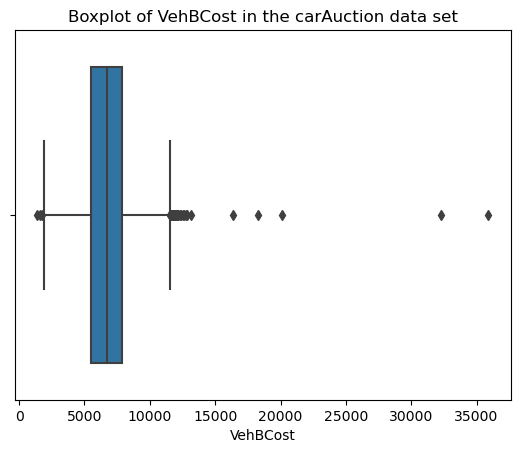

In [37]:
# Boxplot of a numeric variable: VehBCost
snsplot = sns.boxplot(x='VehBCost', data = carAuction)
snsplot.set_title("Boxplot of VehBCost in the carAuction data set")

Text(0.5, 1.0, 'Boxplot of VehicleAge in the carAuction data set')

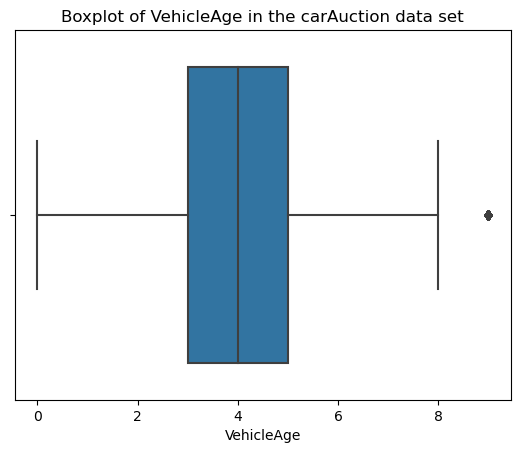

In [38]:
# Boxplot of a numeric variable: VehicleAge
snsplot = sns.boxplot(x='VehicleAge', data = carAuction)
snsplot.set_title("Boxplot of VehicleAge in the carAuction data set")

Text(0.5, 1.0, 'Histogram of VehOdo in the carAuction data set')

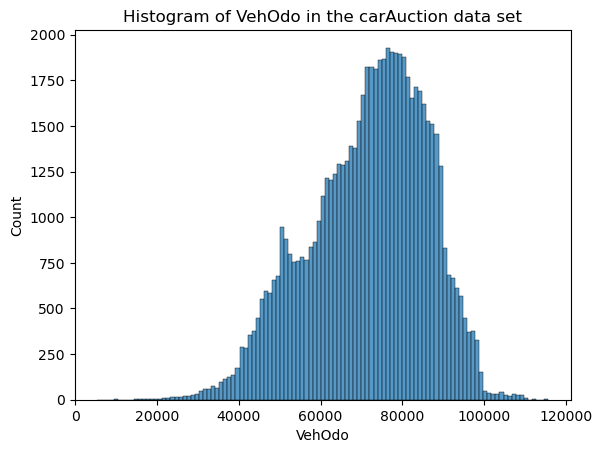

In [39]:
# Histogram of a numeric variable: VehOdo
snsplot = sns.histplot(x='VehOdo', data = carAuction)
snsplot.set_title("Histogram of VehOdo in the carAuction data set")

In [40]:
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,MANHEIM,SILVER,No,5341,MEDIUM,CHRYSLER,6500,4,51954,1086,Covers
1,ADESA,SILVER,No,3688,MEDIUM,FORD,3680,4,89127,983,Covers
2,MANHEIM,RED,No,6868,LARGE,GM,7170,3,71271,1974,Alloy
3,MANHEIM,BLACK,No,7801,LARGE,GM,7670,2,83338,2152,Covers
4,ADESA,WHITE,No,7355,LARGE,GM,7165,2,58698,1500,Alloy


In [55]:
# Display the number of cars in different WheelType
carAuction['WheelType'].value_counts()

Alloy      34780
Covers     31701
Special      730
Name: WheelType, dtype: int64

In [56]:
# Display the proportion of cars in different WheelType
carAuction['WheelType'].value_counts(normalize=True)

Alloy      0.517475
Covers     0.471664
Special    0.010861
Name: WheelType, dtype: float64

Text(0.5, 1.0, 'Countplot of WheelType in the carAuction data set')

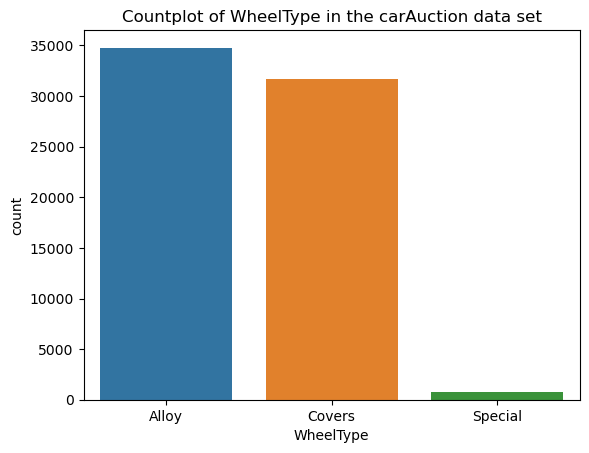

In [57]:
# Plot a categorical variable: WheelType
snsplot = sns.countplot(x='WheelType', data=carAuction)
snsplot.set_title("Countplot of WheelType in the carAuction data set")

Text(0.5, 1.0, 'Scatterplot of VehBCost and MMRCurrentAuctionAveragePrice')

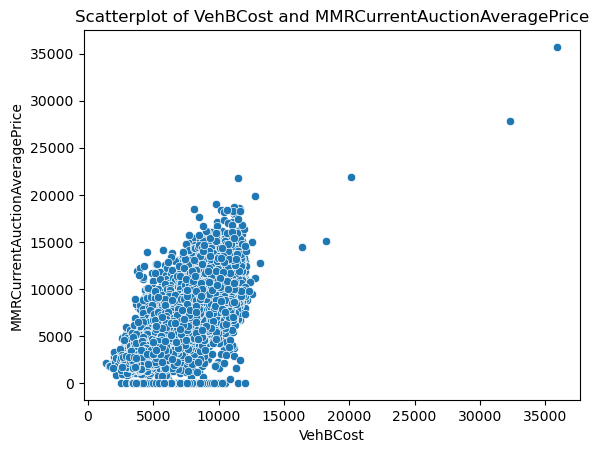

In [58]:
# scatter plot two numeric variables: VehBCost and MMRCurrentAuctionAveragePrice
snsplot = sns.scatterplot(x='VehBCost', y= 'MMRCurrentAuctionAveragePrice', data=carAuction)
snsplot.set_title("Scatterplot of VehBCost and MMRCurrentAuctionAveragePrice")

In [59]:
# Generate correlation coefficients of two numeric variables in a 2x2 matrix: VehBCost and MMRCurrentAuctionAveragePrice
carAuction[['VehBCost','MMRCurrentAuctionAveragePrice']].corr()

,VehBCost,MMRCurrentAuctionAveragePrice
VehBCost,1.000000,0.775695
MMRCurrentAuctionAveragePrice,0.775695,1.000000


In [60]:
# Generate the correlation matrix of all numeric variables
carAuction.corr()

/var/folders/25/_xzr2f1s2yjgy1xmfcjypv8m0000gn/T/ipykernel_19323/3511370131.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  carAuction.corr()


,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost
MMRCurrentAuctionAveragePrice,1.000000,0.775695,-0.588476,-0.028840,-0.054842
VehBCost,0.775695,1.000000,-0.327180,-0.063236,-0.036948
VehicleAge,-0.588476,-0.327180,1.000000,0.307065,0.237107
VehOdo,-0.028840,-0.063236,0.307065,1.000000,0.406373
WarrantyCost,-0.054842,-0.036948,0.237107,0.406373,1.000000


Text(0.5, 1.0, 'Boxplot of VehBCost based on IsBadBuy')

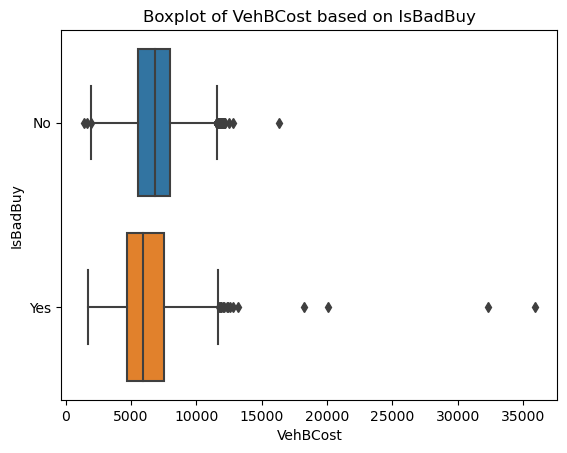

In [61]:
# Examine relationships between numeric and categorical variables: boxplot VehBCost based on IsBadBuy
snsplot = sns.boxplot(x='VehBCost', y= 'IsBadBuy', data = carAuction)
snsplot.set_title("Boxplot of VehBCost based on IsBadBuy")

# Partition for Decision Tree

In [62]:
# Create dummy variables (0.5 pts)
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,No,5341,6500,4,51954,1086,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,No,3688,3680,4,89127,983,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,No,6868,7170,3,71271,1974,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,No,7801,7670,2,83338,2152,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
4,No,7355,7165,2,58698,1500,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,Yes,6326,6680,2,56072,1086,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
67207,Yes,7505,8265,6,94232,909,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
67208,Yes,3106,4950,6,79534,1506,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
67209,Yes,3534,5220,7,79394,3967,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [63]:
# Examine the porportion of target variable for data set
target = carAuction['IsBadBuy']
print(target.value_counts(normalize=True))

No     0.904539
Yes    0.095461
Name: IsBadBuy, dtype: float64


In [64]:
# Partition the data (0.5 pts)
predictors = carAuction.drop(['IsBadBuy'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(47047, 38) (20164, 38) (47047,) (20164,)


In [65]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'No']
minority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'Yes']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=62)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=62)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['IsBadBuy'])
target_train = balanced_data['IsBadBuy']

In [66]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

No     0.5
Yes    0.5
Name: IsBadBuy, dtype: float64 (8838,)


In [67]:
# Examine the porportion of target variable for testing data set (0.5 pts)
print(target_test.value_counts(normalize=True))

No     0.900962
Yes    0.099038
Name: IsBadBuy, dtype: float64


In [68]:
# Build a decision tree model on training data with max_depth = 2 (0.5 pts)
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.5, 0.875, 'VehicleAge <= 4.5\nentropy = 1.0\nsamples = 8838\nvalue = [4419, 4419]\nclass = No'),
 Text(0.25, 0.625, 'VehicleAge <= 2.5\nentropy = 0.961\nsamples = 4524\nvalue = [2787, 1737]\nclass = No'),
 Text(0.125, 0.375, 'VehBCost <= 6095.0\nentropy = 0.831\nsamples = 1005\nvalue = [741, 264]\nclass = No'),
 Text(0.0625, 0.125, 'entropy = 1.0\nsamples = 87\nvalue = [43, 44]\nclass = Yes'),
 Text(0.1875, 0.125, 'entropy = 0.794\nsamples = 918\nvalue = [698, 220]\nclass = No'),
 Text(0.375, 0.375, 'VehBCost <= 4562.5\nentropy = 0.981\nsamples = 3519\nvalue = [2046, 1473]\nclass = No'),
 Text(0.3125, 0.125, 'entropy = 0.964\nsamples = 244\nvalue = [95, 149]\nclass = Yes'),
 Text(0.4375, 0.125, 'entropy = 0.973\nsamples = 3275\nvalue = [1951, 1324]\nclass = No'),
 Text(0.75, 0.625, 'VehicleAge <= 6.5\nentropy = 0.957\nsamples = 4314\nvalue = [1632, 2682]\nclass = Yes'),
 Text(0.625, 0.375, 'VehBCost <= 4687.5\nentropy = 0.981\nsamples = 2941\nvalue = [1235, 1706]\nclass = Yes')

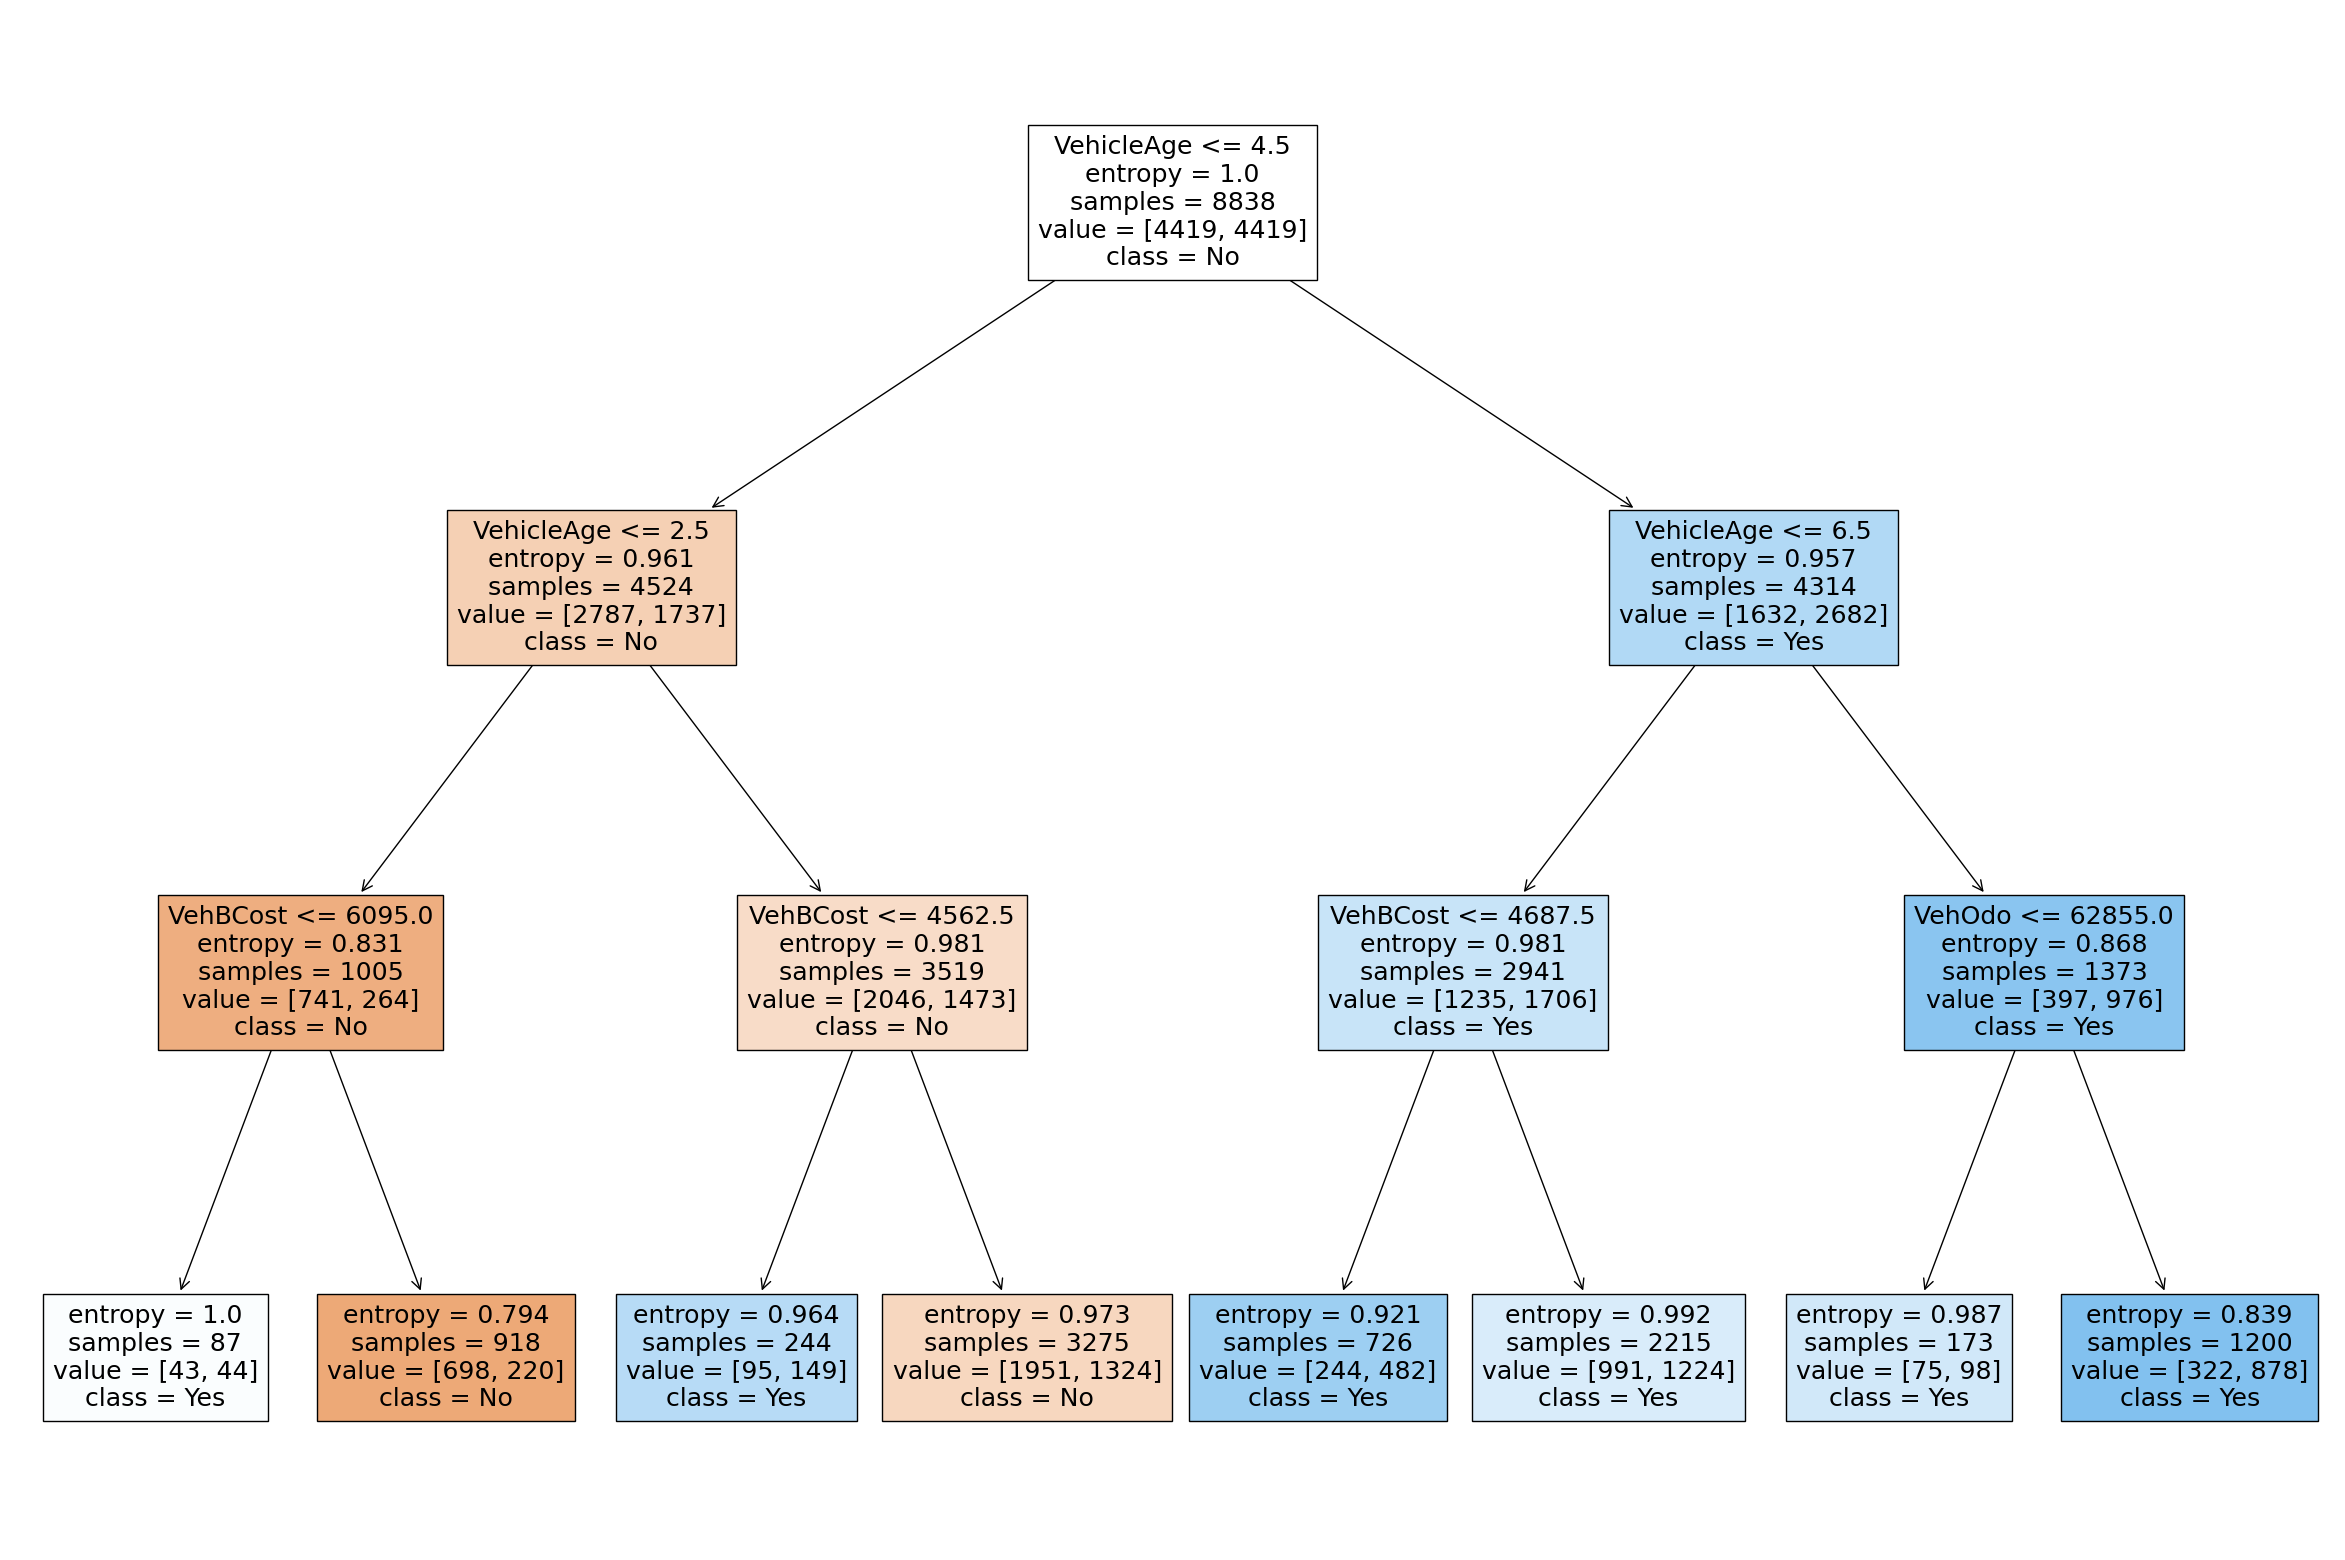

In [69]:
# Plot the tree (0.5 pts)
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [70]:
# Text version of decision tree
print(tree.export_text(model, feature_names=list(carAuction.columns)[1:]))

|--- VehicleAge <= 4.50
|   |--- VehicleAge <= 2.50
|   |   |--- VehBCost <= 6095.00
|   |   |   |--- class: Yes
|   |   |--- VehBCost >  6095.00
|   |   |   |--- class: No
|   |--- VehicleAge >  2.50
|   |   |--- VehBCost <= 4562.50
|   |   |   |--- class: Yes
|   |   |--- VehBCost >  4562.50
|   |   |   |--- class: No
|--- VehicleAge >  4.50
|   |--- VehicleAge <= 6.50
|   |   |--- VehBCost <= 4687.50
|   |   |   |--- class: Yes
|   |   |--- VehBCost >  4687.50
|   |   |   |--- class: Yes
|   |--- VehicleAge >  6.50
|   |   |--- VehOdo <= 62855.00
|   |   |   |--- class: Yes
|   |   |--- VehOdo >  62855.00
|   |   |   |--- class: Yes



In [71]:
# Make predictions on testing data
prediction_on_test = model.predict(predictors_test)

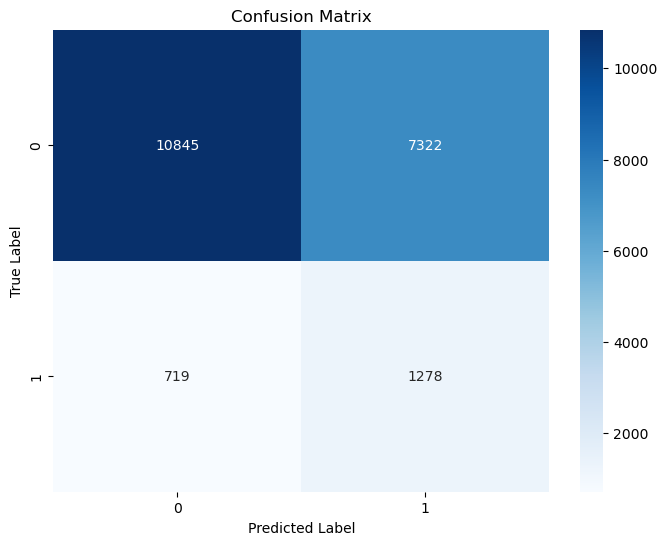

In [72]:
# Examine the evaluation results on testing data: confusion_matrix

#plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

# Compute confusion matrix
cm = confusion_matrix(target_test, prediction_on_test)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()